In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("[INFO] loading images...")
dataset_path = './pyimagesearch/datasets/animals'
imagePaths = list(paths.list_images(dataset_path))

[INFO] loading images...


In [3]:
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [4]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [5]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [6]:
print("[INFO] training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network
Epoch 1/100
71/71 [==============================] - 1s 13ms/step - loss: 1.0007 - accuracy: 0.4831 - val_loss: 0.9345 - val_accuracy: 0.5373
Epoch 2/100
71/71 [==============================] - 1s 12ms/step - loss: 0.9167 - accuracy: 0.5498 - val_loss: 0.9215 - val_accuracy: 0.5373
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8914 - accuracy: 0.5560 - val_loss: 0.9560 - val_accuracy: 0.4933
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8646 - accuracy: 0.5644 - val_loss: 0.9783 - val_accuracy: 0.5187
Epoch 5/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8436 - accuracy: 0.5782 - val_loss: 0.8917 - val_accuracy: 0.5453
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8315 - accuracy: 0.5849 - val_loss: 0.8773 - val_accuracy: 0.5320
Epoch 7/100
71/71 [==============================] - 1s 10ms/step - loss: 0.8215 - accuracy: 0.6018 - val_loss: 0.8669 - val

71/71 [==============================] - 1s 12ms/step - loss: 0.4953 - accuracy: 0.7982 - val_loss: 0.6682 - val_accuracy: 0.6573
Epoch 59/100
71/71 [==============================] - 1s 12ms/step - loss: 0.4892 - accuracy: 0.8076 - val_loss: 0.6907 - val_accuracy: 0.6787
Epoch 60/100
71/71 [==============================] - 1s 12ms/step - loss: 0.4838 - accuracy: 0.8151 - val_loss: 0.8112 - val_accuracy: 0.6187
Epoch 61/100
71/71 [==============================] - 1s 12ms/step - loss: 0.4829 - accuracy: 0.8240 - val_loss: 0.7149 - val_accuracy: 0.6533
Epoch 62/100
71/71 [==============================] - 1s 12ms/step - loss: 0.4776 - accuracy: 0.8156 - val_loss: 0.7098 - val_accuracy: 0.6800
Epoch 63/100
71/71 [==============================] - 1s 13ms/step - loss: 0.4745 - accuracy: 0.8182 - val_loss: 0.7231 - val_accuracy: 0.6707
Epoch 64/100
71/71 [==============================] - 1s 13ms/step - loss: 0.4732 - accuracy: 0.8169 - val_loss: 0.7308 - val_accuracy: 0.6707
Epoch 65/100

In [7]:
# save the network to the disk
print("[INFO] serializing network...")
model.save("./saved-models/shallownet-animal.hdf5")

[INFO] serializing network...


In [8]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["cat", "dog", "panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.56      0.69      0.62       239
         dog       0.63      0.48      0.54       262
       panda       0.86      0.89      0.87       249

    accuracy                           0.68       750
   macro avg       0.68      0.69      0.68       750
weighted avg       0.68      0.68      0.68       750



Text(0, 0.5, 'Loss/Accuracy')

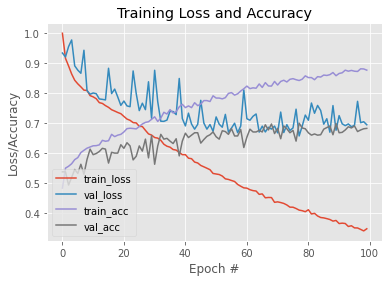

In [9]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")

plt.legend()
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")